# **Palmer Penguins**     
This notebook contains analysis of the Palmer Penguins dataset.   
Information about the dataset can be found [here](https://github.com/PaulShox/poda-mywork#about-the-dataset)

## Setting up the Data

***

#### Importing Libraries 
- Pandas is a Python Library used for cleaning, analyzing and manipulating data. More information can be found [here](https://pandas.pydata.org/docs/)
- NumPy is a Python Library for working with arrays, linear algebra, and matrices. More information can be found [here](https://numpy.org/)
- Matplotlib is a comprehensive Python library for creating static, animated, and interactive visualizations in Python. More information can be found [here](https://matplotlib.org/)
- Seaborn is a Python data visualization library based on matplotlib. More information can be found [here](https://seaborn.pydata.org/)   
- Warnings is used to suppress unnecessary warnings. More infomration can be found [here](https://docs.python.org/3/library/warnings.html#temporarily-suppressing-warnings)


In [1]:
# Import Warnings
import warnings
warnings.simplefilter(action='ignore', category=(FutureWarning, UserWarning))

# Import Pandas    
import pandas as pd 

# Import Matplotlib
import matplotlib.pyplot as plt

# Import Numpy
import numpy as np

#Import Seaborn
import seaborn as sns
from seaborn import pairplot

#### Loading the Data   
- The Palmer Penguins dataset, which is a csv file, is loaded using Pandas *read_csv* functionality. The dataset can be found [here](https://github.com/allisonhorst/palmerpenguins/blob/main/inst/extdata/penguins.csv).
- The variable *peng* is assigned to the dataset for ease of use when writing Python code.

In [2]:
# Load the penguins dataset
peng = pd.read_csv('penguins.csv')

#### Checking the Data has loaded   
- Running the variable *peng* will return a view of all the columns as well as some of the values.
- It will also summarise the amount of rows and columns.   

In [3]:
# Check that the data has loaded
peng

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


## Overview of Dataset

***

##### The following is a brief summary of the dataset:
- A total of 344 penguins were analyzed.
- Males and females from three species of penguins were analyzed.
- There are 8 different variables used in the analysis.
- The penguins were analyzed from three islands in the Palmer Archipelego in the Antartic.
- The analysis was conducted over three years.

##### Variables and Variable Types:

- As mentioned previously, eight variables were used to analyze the penguins. Those variables, and the variable (data) types, are below:

In [4]:
# List the column names, i.e. variables, and each variable (data) type
peng.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

- In Python, there are four main data types - more information [here](https://realpython.com/python-data-types/):
    1.  String. A series of characters. Referred to as 'str' in Python, 'object' in a pandas dataframe.
    2.  Integer. Whole numbers. Referred to as 'int' in Python, 'int64' in a pandas dataframe.
    3.  Float. A decimal point number. Referred to as 'float' in Python, 'float64' in a pandas dataframe.
    4.  Boolean. A True or False value. Referred to as 'bool' in both Python and pandas dataframe.

- Per the penguins dataset:   
    - species, island and sex are classified as object (i.e. string),
    - bill length, bill depth, flipper length and body mass are classified as float64 (i.e. float),
    - year is classified as int64 (i.e., int).

- The variable type classifications seem appropriate.    
    - Any numerical calculations will only be done on the bill length, bill depth, flipper length, and body mass so the float classification is fine.
    - The int classification for year is also fine

## Analyzing the Data   

***

### **1. Initial Basic Analysis**

##### ***First of all, let's see if there is any missing data:***

In [5]:
# Check if there is any missing data from the dataset
peng.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [6]:
# Return rows with missing data
missing = peng[peng.isna().any(axis=1)]
missing

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


##### As can be seen from the above, there is very little missing data; 2 values are missing from four of the Columns, and 11 values are missing from the sex column.    
##### However, in order not to skew any further analysis, I am going to remove those 11 rows:

In [7]:
# Remove rows with missing values
peng.dropna(inplace=True)

##### Check there are no remaining missing values:

In [8]:
# Check for missing values
peng.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

##### ***Now that there is no missing data, let's look at some basic analysis of the data:***

##### ***How many penguins of each species are there?***

In [9]:
# Count number of each species
peng['species'].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

##### ***How many penguins of each sex are there?***

In [10]:
# Count number of each sex (this won't add up to the row amount of 344 as 11 values were missing)
peng['sex'].value_counts()

sex
male      168
female    165
Name: count, dtype: int64

##### ***What is the breakdown of sex in each species?***

In [11]:
# Number of males and females per species
peng.groupby('species').sex.value_counts()

species    sex   
Adelie     female    73
           male      73
Chinstrap  female    34
           male      34
Gentoo     male      61
           female    58
Name: count, dtype: int64

##### ***How many penguins are on each island?***

In [12]:
# Number of penguins on each island
peng['island'].value_counts()

island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64

##### ***What species of penguin are on each island?***

In [13]:
# Penguin species per island
peng.groupby('island').species.value_counts()

island     species  
Biscoe     Gentoo       119
           Adelie        44
Dream      Chinstrap     68
           Adelie        55
Torgersen  Adelie        47
Name: count, dtype: int64

##### ***What is the average size(body mass), bill length, bill depth and flipper length per species and per sex?***

In [14]:
# Group species and sexes by measurement variables
avg3 = peng.groupby(
            ['species', 'sex']
            )[['body_mass_g', 
                'bill_length_mm', 
                'bill_depth_mm', 
                'flipper_length_mm']]

# Get the mean of each each sex per species, sort and round
round(avg3.mean().sort_values('species'))

body_mass_g  bill_length_mm  bill_depth_mm  \
species   sex                                                  
Adelie    female       3369.0            37.0           18.0   
          male         4043.0            40.0           19.0   
Chinstrap female       3527.0            47.0           18.0   
          male         3939.0            51.0           19.0   
Gentoo    female       4680.0            46.0           14.0   
          male         5485.0            49.0           16.0   

                  flipper_length_mm  
species   sex                        
Adelie    female              188.0  
          male                192.0  
Chinstrap female              192.0  
          male                200.0  
Gentoo    female              213.0  
          male                222.0

##### ***What is the standard deviation of each of the above?***

In [37]:
# Standard Deviation of variables
sd1 = peng.groupby(['species', 'sex'])[
                    ['body_mass_g', 
                     'bill_length_mm', 
                     'bill_depth_mm', 
                     'flipper_length_mm']
                     ].std().sort_values('species')
round(sd1, 2)

body_mass_g  bill_length_mm  bill_depth_mm  \
species   sex                                                  
Adelie    female       269.38            2.03           0.94   
          male         346.81            2.28           1.02   
Chinstrap female       285.33            3.11           0.78   
          male         362.14            1.56           0.76   
Gentoo    female       281.58            2.05           0.54   
          male         313.16            2.72           0.74   

                  flipper_length_mm  
species   sex                        
Adelie    female               5.60  
          male                 6.60  
Chinstrap female               5.75  
          male                 5.98  
Gentoo    female               3.90  
          male                 5.67

### **2. Visualizations**

##### ***Firstly, let's take a look at the measurement variables on histograms:***

Text(0.5, 0, 'mm')

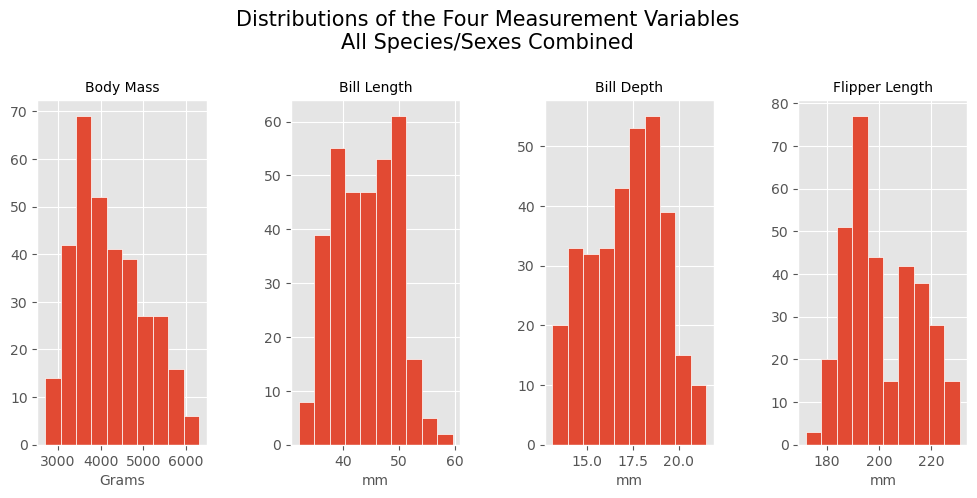

In [33]:
# Plot measurement variables on Histograms

# Assign variables to each measurement variable
body_mass = peng['body_mass_g']
bill_length = peng['bill_length_mm']
bill_depth = peng['bill_depth_mm']
flipper = peng['flipper_length_mm']

# Plot, style, and title the figure that will house the histogram axes
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 5))
plt.style.use('ggplot')
plt.subplots_adjust(wspace=.5, top=.8)
plt.suptitle('Distributions of the Four Measurement Variables'
             '\nAll Species/Sexes Combined', fontsize=15)

# Instruct axes plot type, title, labels, formats
ax1.hist(body_mass, edgecolor='White')
ax1.set_title('Body Mass', fontsize=10)
ax1.set_xlabel('Grams', fontsize=10)

ax2.hist(bill_length, edgecolor='White')
ax2.set_title('Bill Length', fontsize=10)
ax2.set_xlabel('mm', fontsize=10)

ax3.hist(bill_depth, edgecolor='White')
ax3.set_title('Bill Depth', fontsize=10)
ax3.set_xlabel('mm', fontsize=10)

ax4.hist(flipper, edgecolor='White')
ax4.set_title('Flipper Length', fontsize=10)
ax4.set_xlabel('mm', fontsize=10)

##### ***Plot the body mass values for the sex of each species***

Text(0.5, 1.0, 'Gentoo Males')

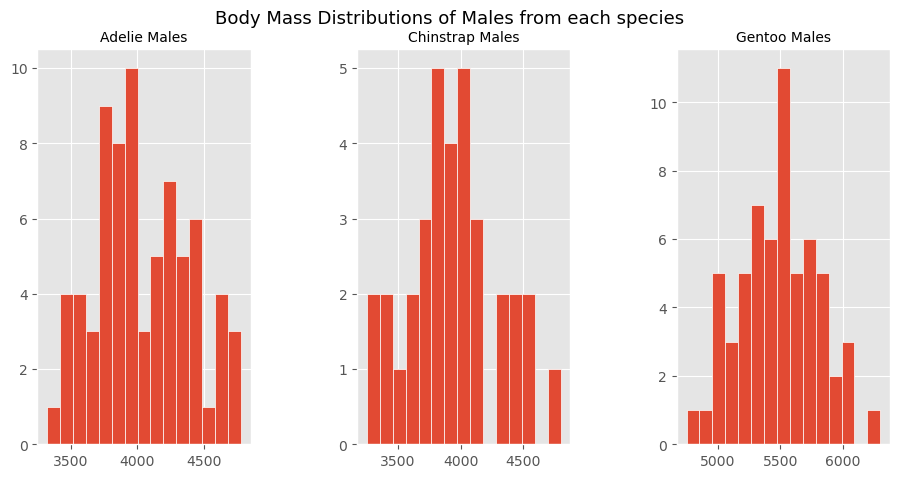

In [34]:
# Create dataframes specific to male body mass values from each species

specs1 = peng['species'] == 'Adelie'
gender1 = peng['sex'] == 'male'
peng4 = peng[specs1 & gender1]  # Filter by Adelie and Males
admbm = peng4['body_mass_g']  # Output body mass values

specs2 = peng['species'] == 'Chinstrap'
gender2 = peng['sex'] == 'male'
peng5 = peng[specs2 & gender2]  # Filter by Chinstrap and Males
chmbm = peng5['body_mass_g'] # Output body mass values

specs3 = peng['species'] == 'Gentoo'
gender3 = peng['sex'] == 'male'
peng5 = peng[specs3 & gender3]  # Filter by Gentoo and Males
gembm = peng5['body_mass_g']  # Output body mass values 

# Outline the plot figure structure, formatting, and title
fig, (axs1, axs2, axs3) = plt.subplots(1,3, figsize=(11,5))
plt.subplots_adjust(wspace=.5, top=.9)
plt.suptitle('Body Mass Distributions of Males from each species', fontsize=13)

# Plot, format, and title the axes 
axs1.hist(admbm, edgecolor='White', bins=15)
axs1.set_title('Adelie Males', fontsize=10)

axs2.hist(chmbm, edgecolor='White', bins=15)
axs2.set_title('Chinstrap Males', fontsize=10)

axs3.hist(gembm, edgecolor='White', bins=15)
axs3.set_title('Gentoo Males', fontsize=10)


# admbm.plot(kind='hist', figsize=(2.5,5), edgecolor='White')
# chmbm.plot(kind='hist', figsize=(2.5,5), edgecolor='White')
# gembm.plot(kind='hist', figsize=(2.5,5), edgecolor='White')

Text(0.5, 1.0, 'Gentoo Females')

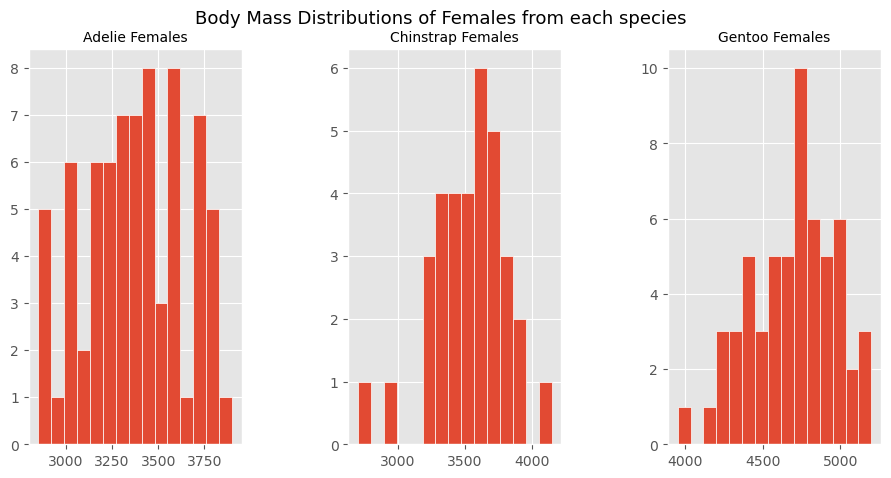

In [36]:
# Create dataframes specific to female body mass from each species
specs4 = peng['species'] == 'Adelie'
gender4 = peng['sex'] == 'female'
peng5 = peng[specs4 & gender4]
adfbm = peng5['body_mass_g']

specs5 = peng['species'] == 'Chinstrap'
gender5 = peng['sex'] == 'female'
peng6 = peng[specs5 & gender5]
chfbm = peng6['body_mass_g']

specs6 = peng['species'] == 'Gentoo'
gender6 = peng['sex'] == 'female'
peng6 = peng[specs6 & gender6]
gefbm = peng6['body_mass_g']

# Outline the plot figure structure, formatting, and title
fig, (axs1, axs2, axs3) = plt.subplots(1,3, figsize=(11,5))
plt.subplots_adjust(wspace=.5, top=.9)
plt.suptitle('Body Mass Distributions of Females from each species', fontsize=13)

# Plot the axes
axs1.hist(adfbm, edgecolor='White', bins=15)
axs1.set_title('Adelie Females', fontsize=10)

axs2.hist(chfbm, edgecolor='White', bins=15)
axs2.set_title('Chinstrap Females', fontsize=10)

axs3.hist(gefbm, edgecolor='White', bins=15)
axs3.set_title('Gentoo Females', fontsize=10)

##### ***Average body mass, bill length, bill depth and flipper length per species per sex***

In [40]:
# Average measurements 
avg2 = peng.groupby(['species', 'sex',])[
                                    ['body_mass_g', 
                                     'bill_length_mm', 
                                     'bill_depth_mm', 
                                     'flipper_length_mm']
                                     ].mean()
round(avg2)

body_mass_g  bill_length_mm  bill_depth_mm  \
species   sex                                                  
Adelie    female       3369.0            37.0           18.0   
          male         4043.0            40.0           19.0   
Chinstrap female       3527.0            47.0           18.0   
          male         3939.0            51.0           19.0   
Gentoo    female       4680.0            46.0           14.0   
          male         5485.0            49.0           16.0   

                  flipper_length_mm  
species   sex                        
Adelie    female              188.0  
          male                192.0  
Chinstrap female              192.0  
          male                200.0  
Gentoo    female              213.0  
          male                222.0

##### ***Plot illustrating average size (body mass) per species per sex:***

<Axes: title={'center': 'Average Body Mass per Species per Sex'}, xlabel='Species', ylabel='Grams'>

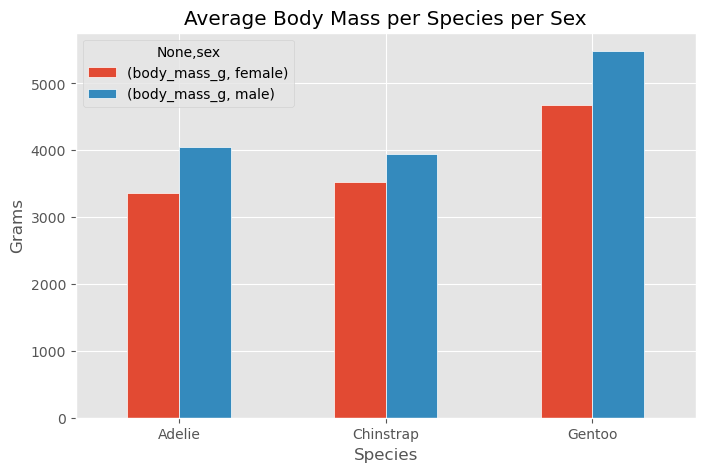

In [20]:
# Plot body mass average per species, per sex.
graph1 = peng.groupby(['species', 'sex'])[['body_mass_g']].mean().sort_values('species').unstack()
plt.style.use('ggplot')
graph1.plot(
            kind='bar', 
            title='Average Body Mass per Species per Sex', 
            xlabel='Species', 
            ylabel='Grams', 
            rot=0, 
            figsize=(8, 5), 
            edgecolor='white'
            )

##### ***Plot illustrating average bill length per species per sex:***

<Axes: title={'center': 'Average Bill Length per Species per Sex'}, xlabel='Species', ylabel='Length (mm)'>

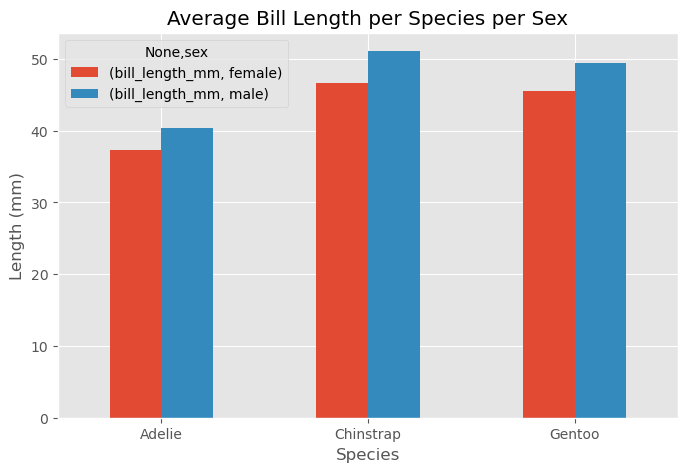

In [21]:
# Plot bill length average per species, per sex.
graph2 = peng.groupby(['species', 'sex'])[['bill_length_mm']].mean().sort_values('species').unstack()
plt.style.use('ggplot')
graph2.plot(
            kind='bar', 
            title='Average Bill Length per Species per Sex', 
            xlabel='Species', 
            ylabel='Length (mm)', 
            rot=0, 
            figsize=(8, 5)
            )

##### ***Plot illustrating average bill depth per species per sex:***

<Axes: title={'center': 'Average Bill Depth per Species per Sex'}, xlabel='Species', ylabel='Length (mm)'>

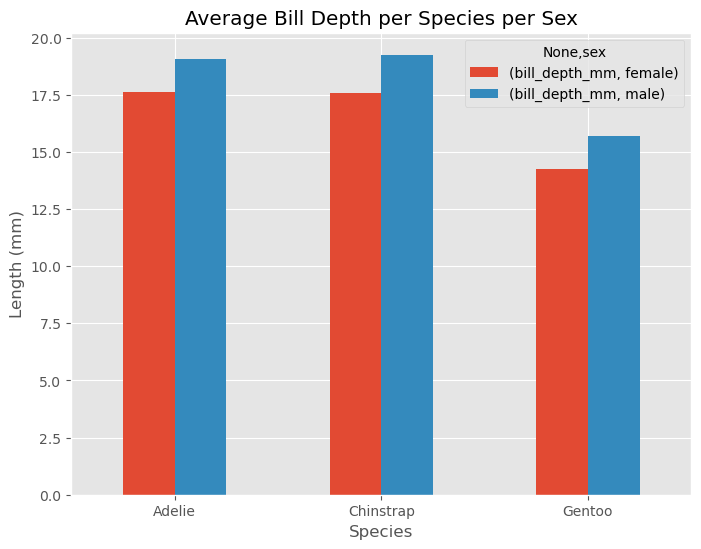

In [22]:
# Plot bill depth average per species, per sex.
graph3 = peng.groupby(['species', 'sex'])[['bill_depth_mm']].mean().sort_values('species').unstack()
plt.style.use('ggplot')
graph3.plot(
            kind='bar', 
            title='Average Bill Depth per Species per Sex', 
            xlabel='Species', 
            ylabel='Length (mm)', 
            rot=0, 
            figsize=(8,6)
            )

##### ***Plot illustrating average flipper length per species per sex:***

<Axes: title={'center': 'Avg Flipper Length per Species per Sex'}, xlabel='Species', ylabel='Length (mm)'>

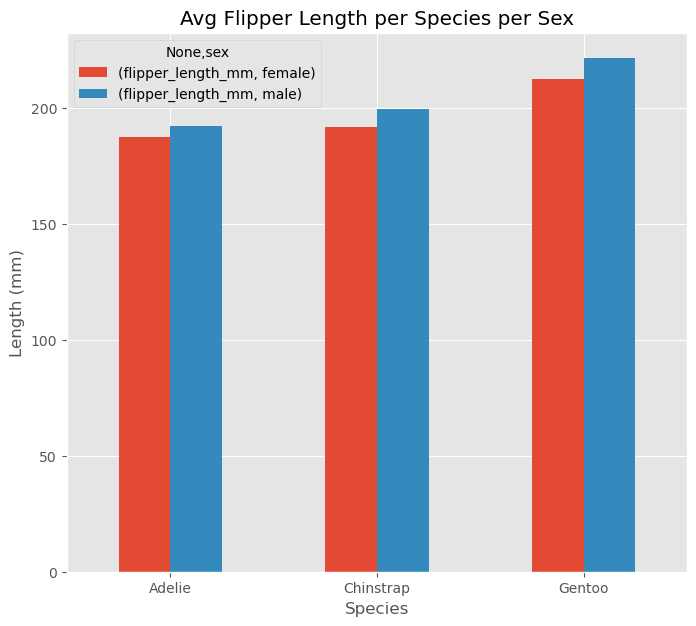

In [23]:
# Plot flipper length average per species, per sex.
graph4 = peng.groupby(['species', 'sex'])[['flipper_length_mm']].mean().sort_values('species').unstack()
plt.style.use('ggplot')
graph4.plot(
            kind='bar', 
            title='Avg Flipper Length per Species per Sex', 
            xlabel='Species', 
            ylabel='Length (mm)', 
            rot=0, 
            figsize=(8, 7)
            )

### **What is the Initial Basic Analysis telling us?**

* Taking the averages of the measurement variables:   
    * Body Mass has large standard deviations across the board, which tells us there are lots of values far from the mean.    
    * For bill length, bill depth, and flipper length, the standard deviations are small, telling us most of the measurements are close to the mean.
* In all categories, on average the male of each species is larger than the female.

## 3. Correlation Analysis 

In this section, I will complete some Correlation analysis.                       

Correlation measures the linear association between two variables. More information on correlation can be found [here](https://en.wikipedia.org/wiki/Correlation)  

It has a value between -1 and 1 where:   
- -1 indicates a perfectly negative linear correlation.   
-  0 indicates no linear correlation.   
- 1 indicates a perfectly positive linear correlation.

##### ***Plot Correlations***   

I will use the Seaborn pairplot functionality to plot the correlations between all the measurement variables on one figure.

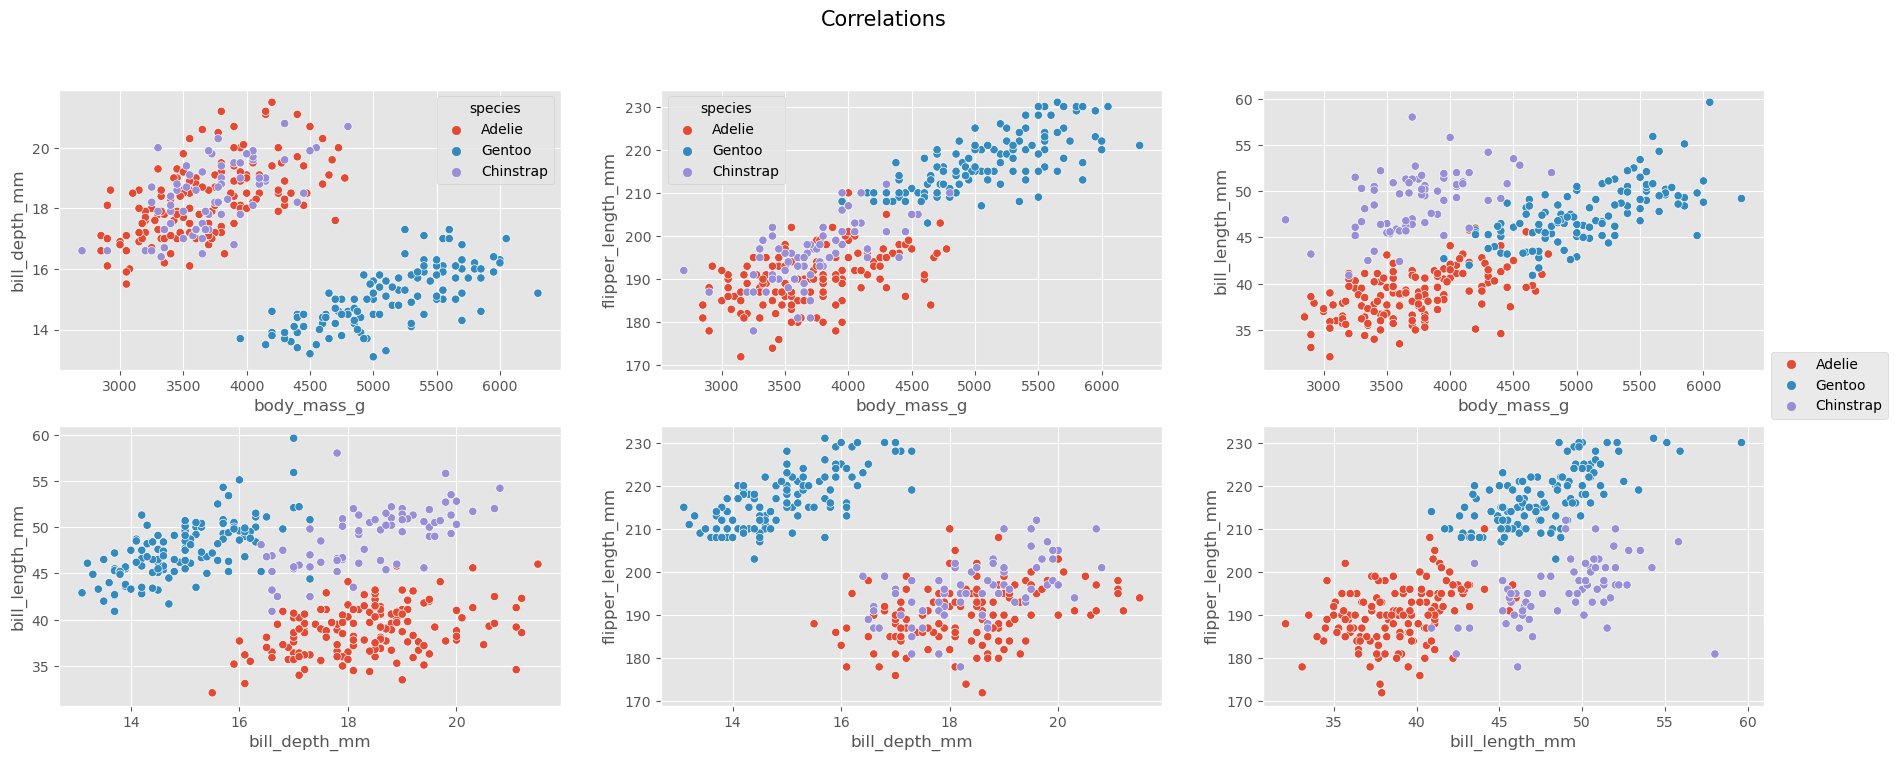

In [24]:

# Assign variables to the measurement variables
body = peng['body_mass_g']
billd = peng['bill_depth_mm']
bill = peng['bill_length_mm']
flip = peng['flipper_length_mm']

# Outline the plot figure structure, title, and formatting 
fig, axes = plt.subplots(2, 3, figsize=(22, 8))
fig.suptitle('Correlations', fontsize=15)

# Plot the axes, x and y representing the variables being correlated.
sns.scatterplot(data=peng, x=body, y=billd, hue='species', ax=axes[0,0])
sns.scatterplot(data=peng, x=body, y=flip, hue='species', ax=axes[0,1])
sns.scatterplot(data=peng, x=body, y=bill, hue='species', ax=axes[0,2], legend=False)
sns.scatterplot(data=peng, x=billd, y=bill, hue='species', ax=axes[1,0], legend=False)
sns.scatterplot(data=peng, x=billd, y=flip, hue='species', ax=axes[1,1], legend=False)
sns.scatterplot(data=peng, x=bill, y=flip, hue='species', ax=axes[1,2])

# Plot the legend outside the axes
plt.legend(loc=3, bbox_to_anchor=(1, 1))

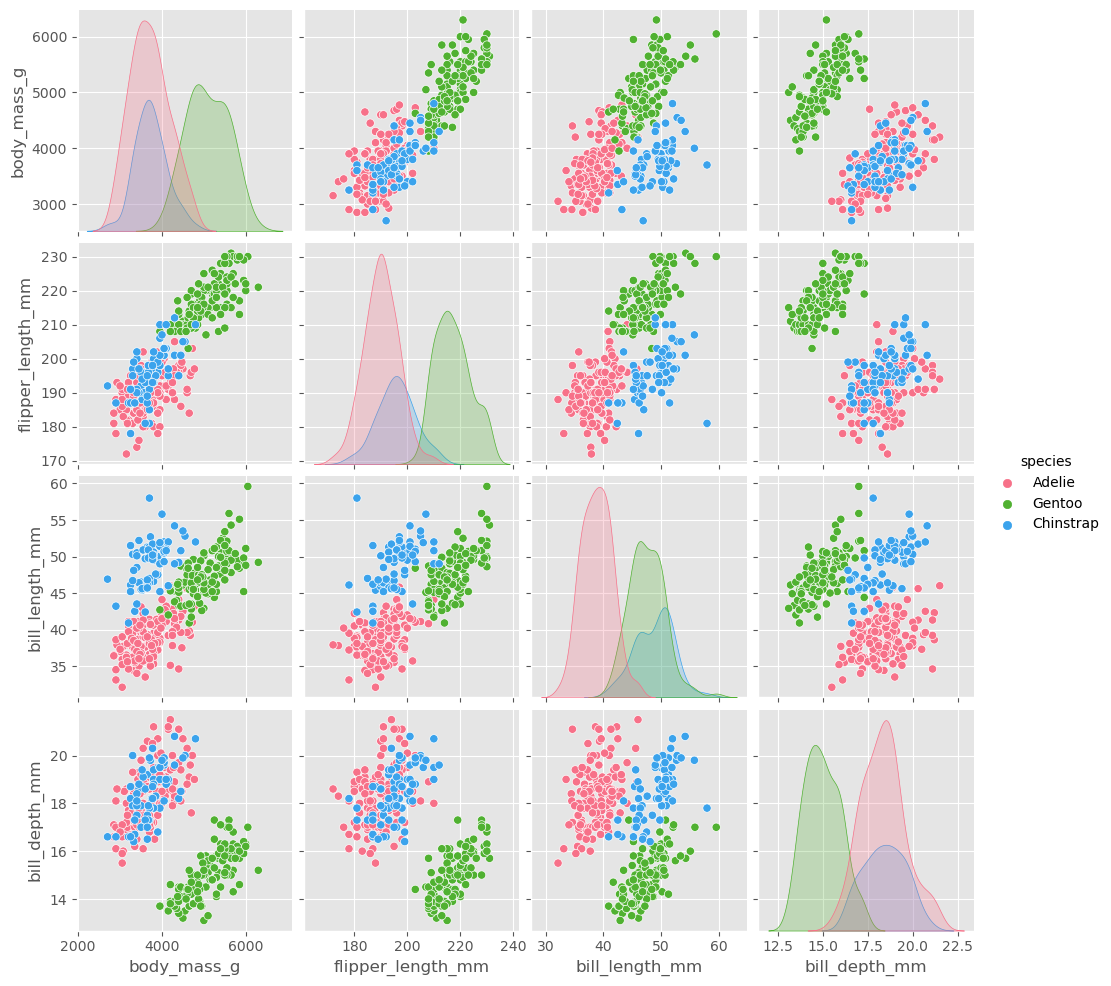

In [25]:
# Use Seaborn to plot all the correlations on one figure.
peng2 = peng[['species', 'body_mass_g', 'flipper_length_mm', 'bill_length_mm', 'bill_depth_mm']]
pairplot(peng2, hue='species', palette='husl')

##### ***Add a Line of Best Fit***   

I will use NumPy's polyfit function to map the line of best fit between a set of variables.   
Information about NumPy's polyfit function can be found [here](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)   
Code to assign colors to species sourced [here](https://python-graph-gallery.com/custom-legend-with-matplotlib/)

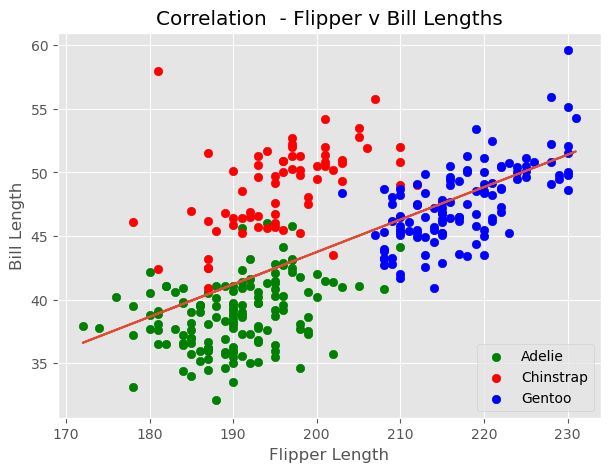

In [41]:
# Fit a line of best fit between x and y
# In this example, Flipper and Bill Lengths

# Assign variables for the variables being measured.
flipper = peng['flipper_length_mm'].values
bill = peng['bill_length_mm'].values

# Create unique values for each species name
SPECIES = peng['species'].values
SPECIES_ = np.unique(SPECIES)

# Create a list of colors to be allocated to each species name
COLORS = ['green', 'red', 'blue']

# Create a figure and set of axes (just one in this case)
fig, ax = plt.subplots(figsize=(7,5))

# Combine the SPECIES_ and COLORS iterables using zip()
for species, color in zip(SPECIES_, COLORS):
    indx = np.where(SPECIES == species)

    # Map each flipper and bill length value to the axes using colors specified
    # No legend will be generated if label=species isn't passed
    ax.scatter(flipper[indx], bill[indx], label=species, color=color)   
ax.legend()
ax.set_xlabel('Flipper Length')
ax.set_ylabel('Bill Length')
ax.set_title('Correlation  - Flipper v Bill Lengths')

# Use NumPy's polyfit function to plot the line of best fit
m, c = np.polyfit(flipper, bill, 1)
plt.plot(flipper, m*flipper + c)

##### ***Calculate the Correlation Coefficient***  

The measurement of the correlation coefficient using the NumPy corrcoef function.

In [27]:
# Calculate the correlation coefficient figure
np.corrcoef(flipper, bill)

array([[1.        , 0.65309564],
       [0.65309564, 1.        ]])

The correlation coefficient can also be calculated for all the other correlations.

In [28]:
body = peng['body_mass_g']
bill_l = peng['bill_length_mm']
bill_d = peng['bill_depth_mm']
flipper = peng['flipper_length_mm']

np.corrcoef((body, bill_l), (body, bill_d))

array([[ 1.        ,  0.58945111,  1.        , -0.47201566],
       [ 0.58945111,  1.        ,  0.58945111, -0.22862564],
       [ 1.        ,  0.58945111,  1.        , -0.47201566],
       [-0.47201566, -0.22862564, -0.47201566,  1.        ]])

***
### End